In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
dataset=pd.read_excel("advertising_sales_data.xlsx")

In [30]:
dataset.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [31]:
df=dataset.drop(columns="Campaign")

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df.isnull().sum()

TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [34]:
df['Radio'] = df['Radio'].fillna(df['Radio'].mean())

In [35]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

average spent on tv

In [36]:
sum=0
for i in df["TV"]:
    sum=sum+i
sum    

29408.499999999996

In [37]:
avg=sum/200
avg # std == avg

147.0425

correlation between radio advertising expenditure and product sales

In [38]:
correlation=df["Radio"].corr(df["Sales"])
correlation

np.float64(0.3496507429302875)

correlation between all the columns

In [39]:
corr_values = df.corrwith(df['Sales']).abs().sort_values(ascending=False)
corr_values 

Sales        1.000000
TV           0.901208
Radio        0.349651
Newspaper    0.157960
dtype: float64

linear regression 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [41]:
x=df.iloc[:,:-1]
y= df["Sales"]


In [42]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8935683305189493, 0.9032035711424015)

plotting the graph

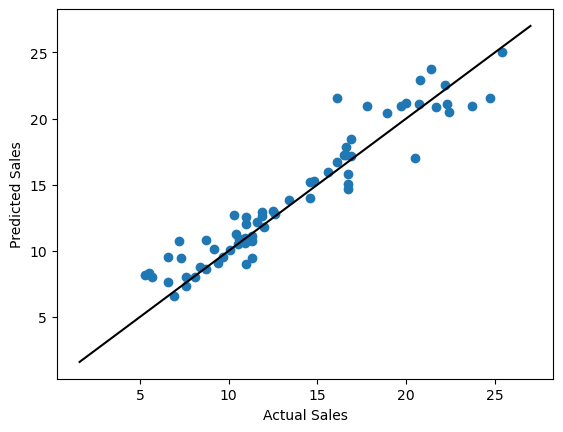

In [43]:
y_pred=lr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-')  # 45-degree line
plt.show()

predicting for 200,40,50

In [44]:
lr.predict([[200,40,50]])

array([19.96149968])

normalizing the dataset

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [46]:

lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train), lr1.score(x_test,y_test)

(0.8935683305189493, 0.9074456831238731)

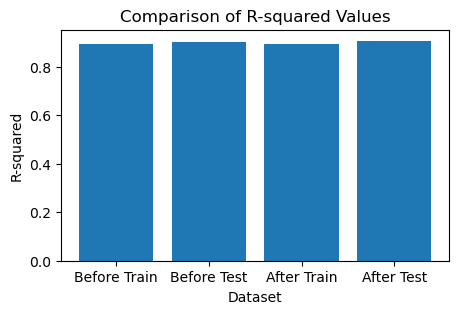

In [47]:
# creating bar plot to visualize changes after and before normalization
before_train = 0.8935683305189493
before_test =  0.9032035711424015
after_train = 0.8935683305189493
after_test = 0.9074456831238731

# Create bar chart
plt.figure(figsize=(5,3))
plt.bar(['Before Train', 'Before Test', 'After Train', 'After Test'], [before_train, before_test, after_train, after_test])
plt.xlabel('Dataset')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values')
plt.show()

using only radio and newspaper

In [48]:
x_new=x.drop(columns=["TV"])
x_new.head()

,Radio,Newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4


In [49]:
x_train, x_test, y_train, y_test = train_test_split( x_new, y, test_size=0.33, random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.15289217841466884, -0.08223020885630894)